In [37]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

## read dataframe
df = pd.read_csv("train.csv").drop('PassengerId', axis=1)

## split between features and label
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

## create hold-out
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=102,
    stratify=y
    )

## identify columns
num = X_train.select_dtypes(exclude='object').columns
num_pipe = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy="mean")),
        ('scaler', StandardScaler())
     ]
    )

cat = X_train.select_dtypes(include='object').columns
cat_pipe = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(handle_unknown="ignore")),
        ('fel', SelectPercentile(chi2, percentile=50))
         ]
    )

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', num_pipe, num),
        ('categorical', cat_pipe, cat)
        ]
    )

score_train = []
score_test  = []
estimators = [50, 100]

for i in estimators:
    model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=i, random_state=102)
    combine_pipe = Pipeline(
        steps=[
            ("preprocessor", preprocessor), ("model", model)
            ]
        )

    scores = cross_val_score(
    combine_pipe,
    X_train,
    y_train, cv=10, scoring='accuracy'

    )

    scores_test = cross_val_score(
    combine_pipe,
    X_test,
    y_test, cv=10, scoring='accuracy'

    )

    score_test.append(np.mean(scores_test))
    score_train.append(np.mean(scores))

#print(f'accuracy: {np.mean(score_train):.3f} 'f'+/- {np.std(scores):.3f}')


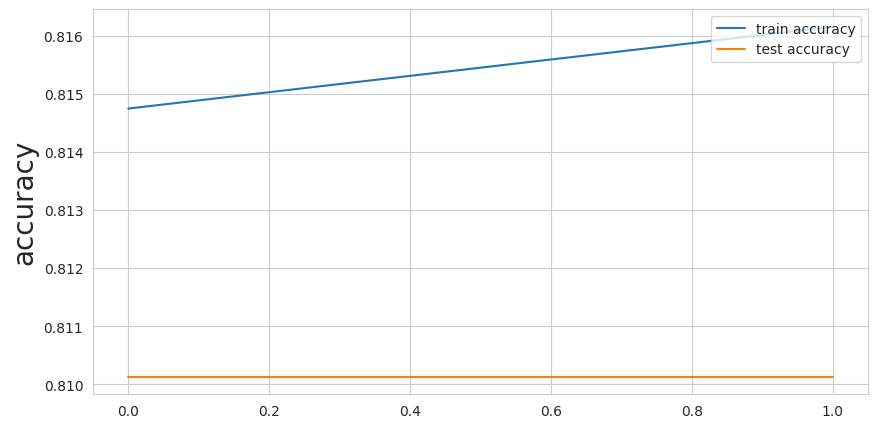

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(score_train, label="train accuracy")
plt.plot(score_test, label="test accuracy")
plt.legend(loc="upper right")
#plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [38]:
# scores = cross_val_score(
#     combine_pipe,
#     X_train,
#     y_train, cv=10, scoring='accuracy'

#     )

# print(f'accuracy: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')

In [39]:
# scores = cross_val_score(
#     combine_pipe,
#     X_test,
#     y_test, cv=10, scoring='accuracy'

#     )

# print(f'Acc: {np.mean(scores):.3f} 'f'+/- {np.std(scores):.3f}')